## GOAL: Use GOSeq to identify enriched GO terms following nutrient addition etc. 

In [1]:
#Load in the goseq library
library(goseq)

Loading required package: BiasedUrn
Loading required package: geneLenDataBase
Creating a generic function for ‘nchar’ from package ‘base’ in package ‘S4Vectors’
Loading required package: DBI



### Ann Tarrant shared some of her code that she used with her copepod data to identify enrichment for a novel organism. It made the whole process much easier. I am using this as the basis for the function that I write. 

In [ ]:

# assayed.genes <- scan("Transcriptome_Names.txt", what=character())
# gene.length=scan("Transcriptome_Lengths.txt", what=numeric())
# de.genes <- scan("DE_Culture_Transcript_Names.txt", what=character())
# gene.vector=as.integer(assayed.genes %in% de.genes)
# names(gene.vector)=assayed.genes
# go.ids= read.delim("CfT_reference_full.annot",header=FALSE)
# #head(go.ids)

# library(goseq)
# pwf=nullp(gene.vector,bias.data=gene.length)
# # If you want to look at pwf on finer scale
# #plotPWF(pwf,binsize=1000)

# GO.wall=goseq(pwf,gene2cat=go.ids)
# write.table(GO.wall, "Go_Wall.txt", append=FALSE, quote=FALSE, sep="\t", eol="\n")
  
# enriched.GO=GO.wall$category[p.adjust(GO.wall$over_represented_pvalue,method="BH")<0.05]
# write.table(enriched.GO, "enriched_GO.txt", append=FALSE, quote=FALSE, sep="\t", eol="\n")

# under_rep.GO=GO.wall$category[p.adjust(GO.wall$under_represented_pvalue,method="BH")<0.05]
# write.table(under_rep.GO, "under_rep_GO.txt", append=FALSE, quote=FALSE, sep="\t", eol="\n")

# library(GO.db)
# GO_set <- scan("Enriched_GO_only.txt", what=character())
# for(go in GO_set){
# temp <- select(GO.db, go, "TERM")
# print(temp)
# write.table(temp, "Enriched_table.txt", append=TRUE, quote=FALSE, sep="\t", eol="\n")
# }




## Try to write a function to do all of the following steps



In [4]:
assayed.genes <- scan("All_Gene_List.tab", what = character())
gene.length <- scan("All_Gene_Length.tab", what = numeric())
go.ids = read.delim(file = 'Ehux_OG_GO.annot', header = FALSE)


In [11]:
getEnrch <- function(asssayed.genes.file, gene.lengths.file, go.ids.file, de.genes.file, output.string){
    #runs through the typical GO enrichment commands and returns 3 txt files listing the enriched and under
    #represented GO terms as well as the whole GO.wall table. Returns the GO.wall to the working environment. 
    
    #read in a full gene list (for the background analysis)
    assayed.genes <- scan(asssayed.genes.file, what = character())
    
    #read in the gene lengths
    gene.length <- scan(gene.lengths.file, what = numeric())
    
    # read in the defined .annot file (see output from Blast2Go)
    go.ids = read.delim(file = go.ids.file, header = FALSE)
    
    # read in a list of de genes
    de.genes <- scan(de.genes.file, what = character())  

    #create a binary presence/absence gene vector to go along with the full gene list re: the de genes
    gene.vector = as.integer(assayed.genes %in% de.genes)
    names(gene.vector) = assayed.genes
    
    #Fit data with probability weighting function based on gene length bins; 
    pwf = nullp(gene.vector, bias.data = gene.length)
    
    #run the enrichment anlaysis
    GO.wall = goseq(pwf,gene2cat=go.ids)
    
    #get the over and under represented gene sets
    GO.overrep = GO.wall$category[GO.wall$over_represented_pvalue<0.05]
    GO.underrep = GO.wall$category[GO.wall$under_represented_pvalue<0.05]

    #write out the data
    write.table(GO.wall, paste(output.string, "Go_Wall.txt", sep='.'), append=FALSE, quote=FALSE, sep="\t", eol="\n")
    write.table(GO.overrep, paste(output.string, "Go_OverRep.txt", sep='.'), 
                append=FALSE, quote=FALSE, sep="\t", eol="\n")
    write.table(GO.overrep, paste(output.string, "Go_OverRep.txt", sep='.'), 
                append=FALSE, quote=FALSE, sep="\t", eol="\n")
return(GO.wall)}

Warning message:
In pcls(G): initial point very close to some inequality constraintsUsing manually entered categories.
For 40272 genes, we could not find any categories. These genes will be excluded.
To force their use, please run with use_genes_without_cat=TRUE (see documentation).
This was the default behavior for version 1.15.1 and earlier.
Calculating the p-values...
Using manually entered categories.
For 40272 genes, we could not find any categories. These genes will be excluded.
To force their use, please run with use_genes_without_cat=TRUE (see documentation).
This was the default behavior for version 1.15.1 and earlier.
Calculating the p-values...


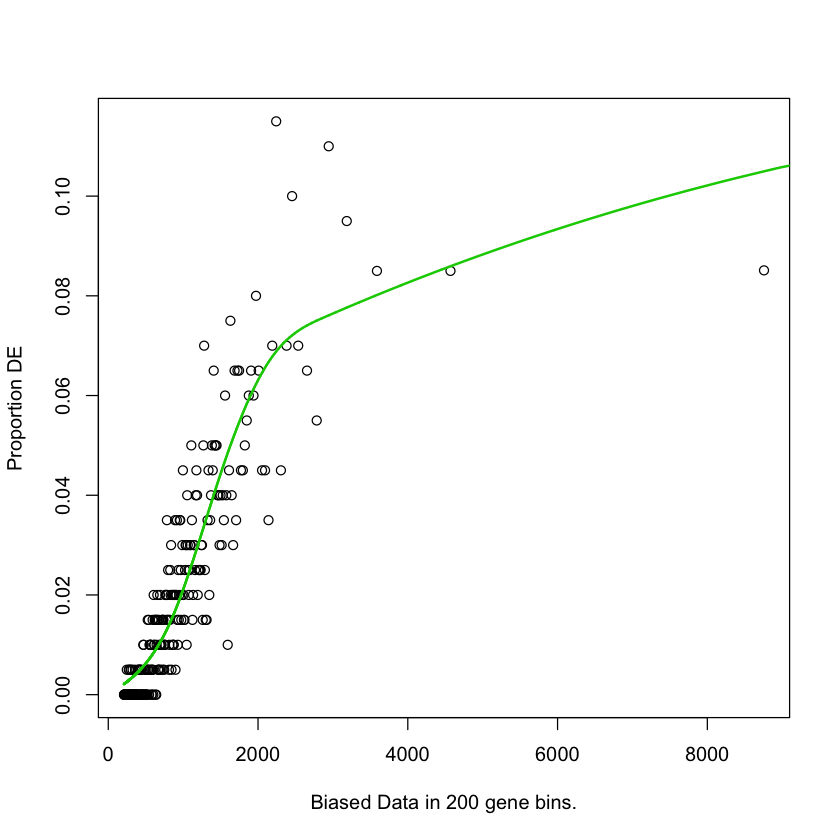

Using manually entered categories.
For 40272 genes, we could not find any categories. These genes will be excluded.
To force their use, please run with use_genes_without_cat=TRUE (see documentation).
This was the default behavior for version 1.15.1 and earlier.
Calculating the p-values...


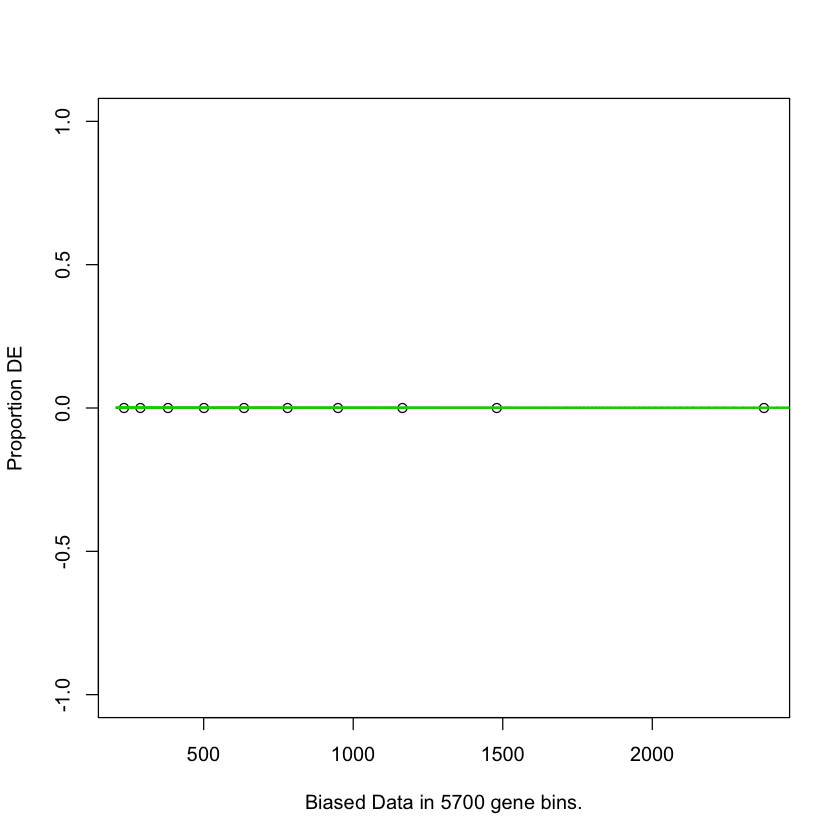

Warning message:
In pcls(G): initial point very close to some inequality constraintsUsing manually entered categories.
For 40272 genes, we could not find any categories. These genes will be excluded.
To force their use, please run with use_genes_without_cat=TRUE (see documentation).
This was the default behavior for version 1.15.1 and earlier.
Calculating the p-values...


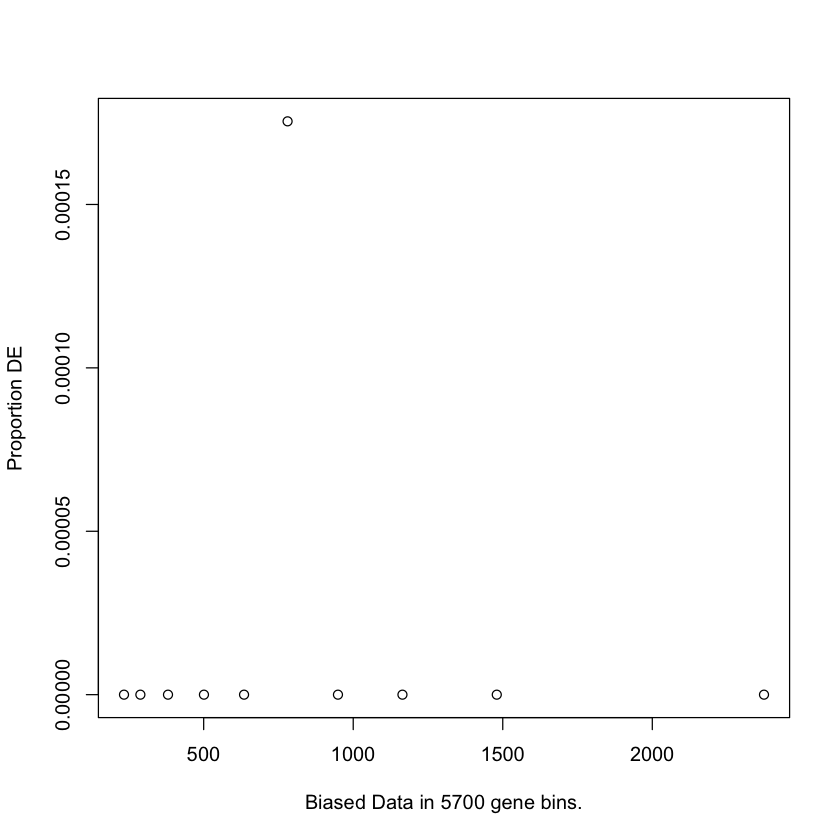

Warning message:
In pcls(G): initial point very close to some inequality constraintsUsing manually entered categories.
For 40272 genes, we could not find any categories. These genes will be excluded.
To force their use, please run with use_genes_without_cat=TRUE (see documentation).
This was the default behavior for version 1.15.1 and earlier.
Calculating the p-values...


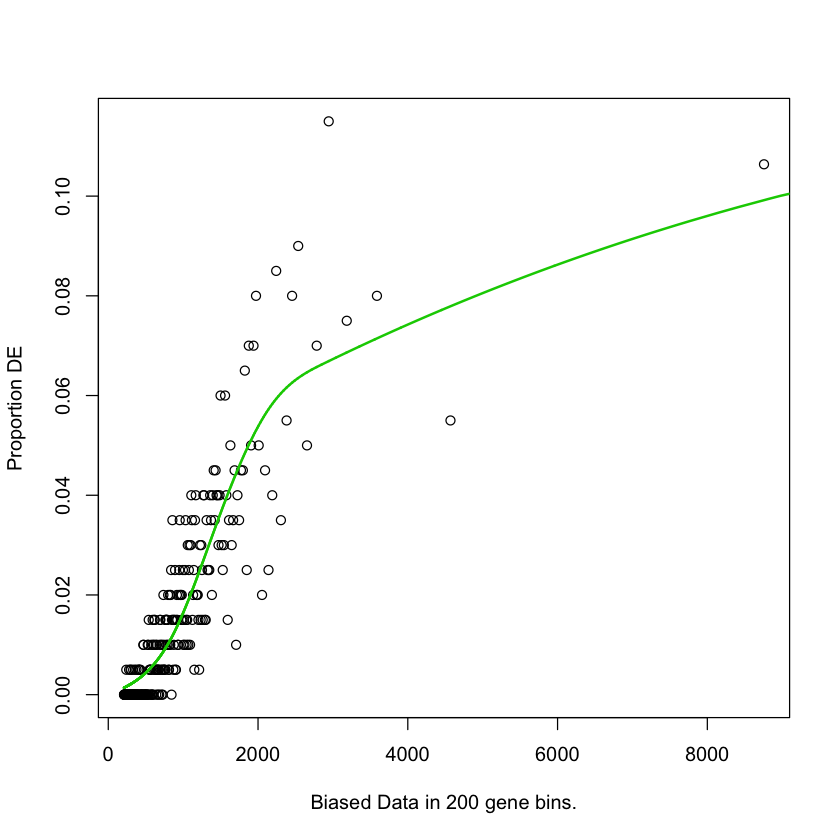

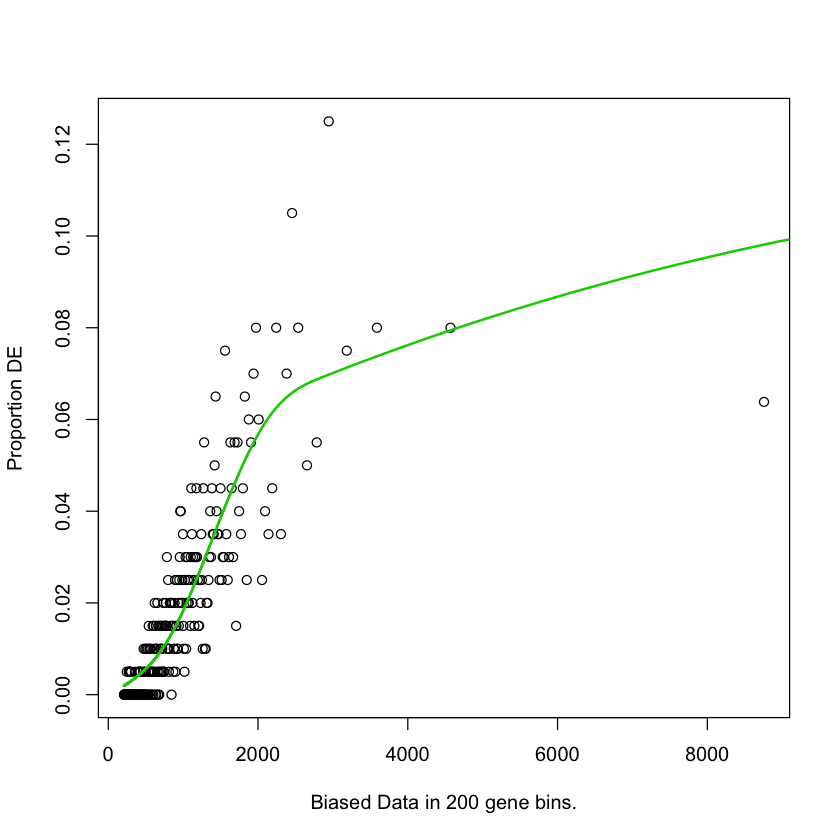

In [13]:
QvR.GO.wall = getEnrch('All_Gene_List.tab', 'All_Gene_Length.tab', 'Ehux_OG_GO.annot', 
                       'Q_con_vs_R_PlusNUP.csv', 'QvR_Up')
QvS.GO.wall = getEnrch('All_Gene_List.tab', 'All_Gene_Length.tab', 'Ehux_OG_GO.annot', 
                       'Q_con_vs_S_PlusPUP.csv', 'QvS_Up')
QvT.GO.wall = getEnrch('All_Gene_List.tab', 'All_Gene_Length.tab', 'Ehux_OG_GO.annot', 
                       'Q_con_vs_T_MinusNUP.csv', 'QvT_Up')
QvV.GO.wall = getEnrch('All_Gene_List.tab', 'All_Gene_Length.tab', 'Ehux_OG_GO.annot', 
                       'Q_con_vs_V_MinusPUP.csv', 'QvV_Up')
QvX.GO.wall = getEnrch('All_Gene_List.tab', 'All_Gene_Length.tab', 'Ehux_OG_GO.annot', 
                       'Q_con_vs_X_PlusDSWUP.csv', 'QvX_Up')

Warning message:
In pcls(G): initial point very close to some inequality constraintsUsing manually entered categories.
For 40272 genes, we could not find any categories. These genes will be excluded.
To force their use, please run with use_genes_without_cat=TRUE (see documentation).
This was the default behavior for version 1.15.1 and earlier.
Calculating the p-values...
Warning message:
In pcls(G): initial point very close to some inequality constraintsUsing manually entered categories.
For 40272 genes, we could not find any categories. These genes will be excluded.
To force their use, please run with use_genes_without_cat=TRUE (see documentation).
This was the default behavior for version 1.15.1 and earlier.
Calculating the p-values...


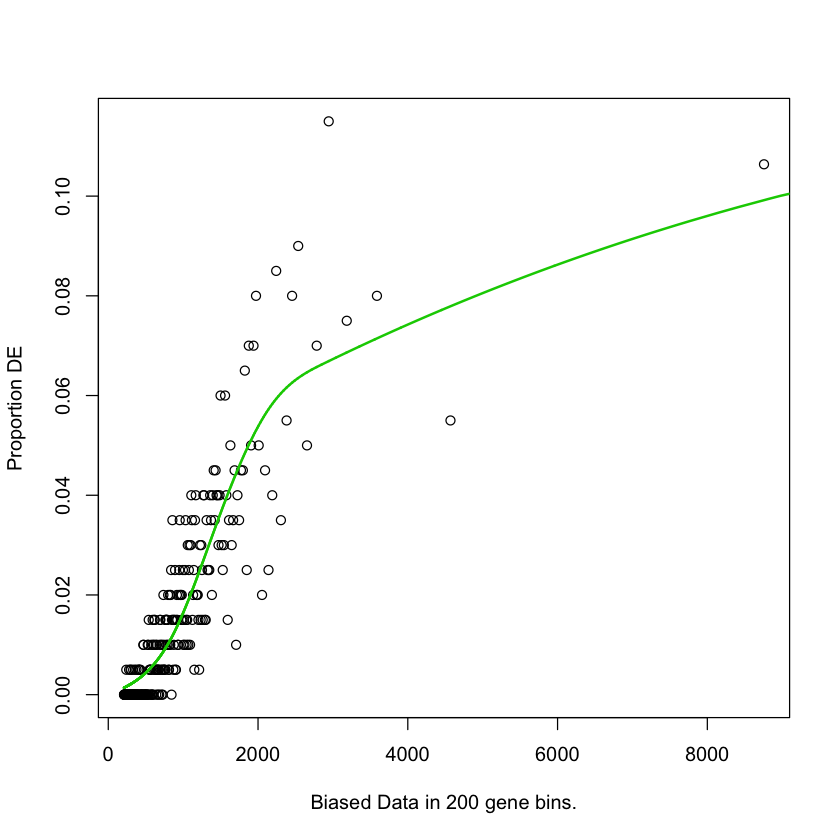

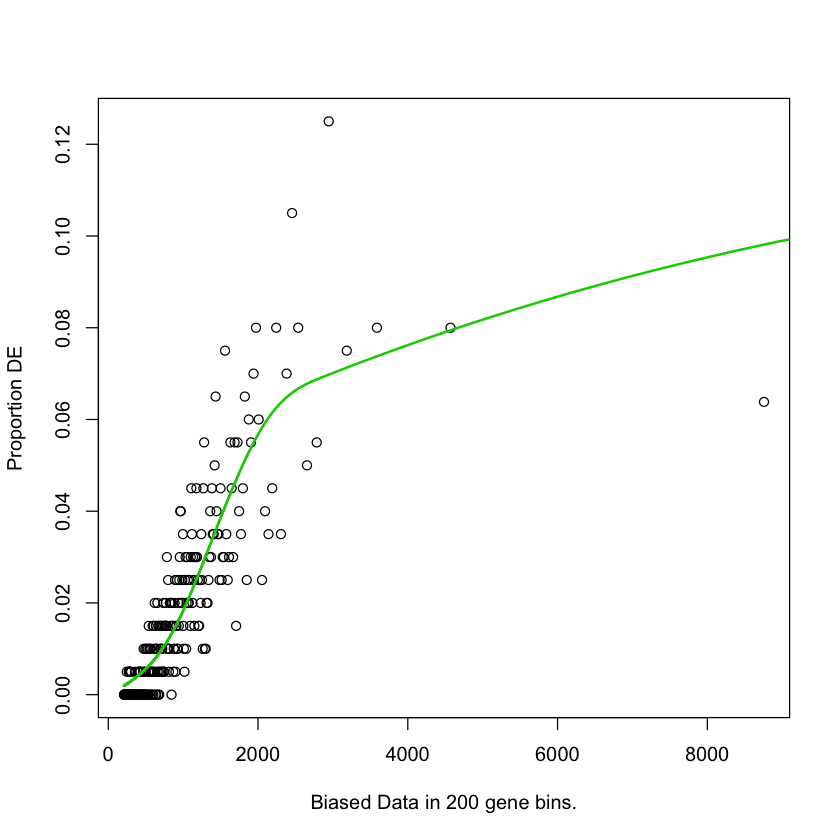

In [14]:
QvV.GO.wall = getEnrch('All_Gene_List.tab', 'All_Gene_Length.tab', 'Ehux_OG_GO.annot', 
                       'Q_con_vs_V_MinusPUP.csv', 'QvV_Up')
QvX.GO.wall = getEnrch('All_Gene_List.tab', 'All_Gene_Length.tab', 'Ehux_OG_GO.annot', 
                       'Q_con_vs_X_PlusDSWUP.csv', 'QvX_Up')

In [15]:


# A plotting R script produced by the REVIGO server at http://revigo.irb.hr/
# If you found REVIGO useful in your work, please cite the following reference:
# Supek F et al. "REVIGO summarizes and visualizes long lists of Gene Ontology
# terms" PLoS ONE 2011. doi:10.1371/journal.pone.0021800


# --------------------------------------------------------------------------
# If you don't have the ggplot2 package installed, uncomment the following line:
# install.packages( "ggplot2" );
library( ggplot2 );
# --------------------------------------------------------------------------
# If you don't have the scales package installed, uncomment the following line:
# install.packages( "scales" );
library( scales );


# --------------------------------------------------------------------------
# Here is your data from REVIGO. Scroll down for plot configuration options.

revigo.names <- c("term_ID","description","frequency_%","plot_X","plot_Y","plot_size","log10_p_value","uniqueness","dispensability");
revigo.data <- rbind(c("GO:0009405","pathogenesis", 0.620, 1.190,-2.787, 5.489,-1.7850,0.928,0.000),
c("GO:0009765","photosynthesis, light harvesting", 0.007, 0.132, 0.664, 3.523,-11.0189,0.862,0.000),
c("GO:0030416","methylamine metabolic process", 0.002,-5.306,-3.145, 2.989,-1.3370,0.875,0.003),
c("GO:0038032","termination of G-protein coupled receptor signaling pathway", 0.015, 6.395, 3.064, 3.880,-3.7765,0.698,0.015),
c("GO:0006939","smooth muscle contraction", 0.007, 2.747,-4.985, 3.571,-1.3665,0.879,0.031),
c("GO:0006836","neurotransmitter transport", 0.046, 6.124,-2.282, 4.357,-2.0426,0.859,0.034),
c("GO:0006801","superoxide metabolic process", 0.138, 4.748,-4.536, 4.836,-1.6109,0.879,0.035),
c("GO:0051017","actin filament bundle assembly", 0.007,-1.219,-5.394, 3.515,-2.3416,0.751,0.055),
c("GO:0006631","fatty acid metabolic process", 0.867,-4.188, 4.214, 5.635,-2.8162,0.641,0.074),
c("GO:0006629","lipid metabolic process", 3.094,-5.724,-1.108, 6.187,-2.4724,0.800,0.137),
c("GO:0055114","oxidation-reduction process",15.044,-4.415,-0.034, 6.874,-1.8831,0.804,0.210),
c("GO:0006071","glycerol metabolic process", 0.254,-5.080, 5.147, 5.102,-2.0346,0.696,0.225),
c("GO:0001932","regulation of protein phosphorylation", 0.166, 3.513, 5.599, 4.916,-2.3557,0.678,0.226),
c("GO:0044070","regulation of anion transport", 0.063, 5.989, 1.020, 4.497,-1.4321,0.772,0.241),
c("GO:0006572","tyrosine catabolic process", 0.002,-6.352, 2.703, 3.072,-1.3772,0.757,0.284),
c("GO:0045893","positive regulation of transcription, DNA-templated", 0.193, 4.897, 4.867, 4.983,-2.2614,0.731,0.336),
c("GO:0006120","mitochondrial electron transport, NADH to ubiquinone", 0.107,-1.068, 4.885, 4.724,-1.4143,0.681,0.404),
c("GO:0006471","protein ADP-ribosylation", 0.005, 0.687, 7.894, 3.422,-1.8312,0.716,0.423),
c("GO:0030148","sphingolipid biosynthetic process", 0.004,-2.516, 6.333, 3.329,-1.5604,0.755,0.482),
c("GO:0007165","signal transduction", 3.804, 5.405, 3.353, 6.277,-1.3795,0.654,0.520),
c("GO:0006470","protein dephosphorylation", 0.176, 1.774, 8.018, 4.942,-2.0680,0.779,0.540),
c("GO:0006097","glyoxylate cycle", 0.055,-5.229, 4.620, 4.436,-1.9378,0.689,0.601),
c("GO:1901023","4-hydroxyphenylacetate catabolic process", 0.011,-6.053, 3.859, 3.747,-1.3727,0.704,0.606),
c("GO:0007188","adenylate cyclase-modulating G-protein coupled receptor signaling pathway", 0.011, 6.208, 2.794, 3.743,-2.2721,0.702,0.624),
c("GO:0006650","glycerophospholipid metabolic process", 0.339,-1.161, 6.558, 5.227,-1.4356,0.700,0.683),
c("GO:0007186","G-protein coupled receptor signaling pathway", 0.368, 6.045, 3.311, 5.263,-1.4818,0.659,0.707),
c("GO:0051764","actin crosslink formation", 0.001,-1.498,-5.366, 2.611,-2.3416,0.764,0.736),
c("GO:0030042","actin filament depolymerization", 0.007,-1.768,-5.232, 3.531,-1.6904,0.751,0.817));

one.data <- data.frame(revigo.data);
names(one.data) <- revigo.names;
one.data <- one.data [(one.data$plot_X != "null" & one.data$plot_Y != "null"), ];
one.data$plot_X <- as.numeric( as.character(one.data$plot_X) );
one.data$plot_Y <- as.numeric( as.character(one.data$plot_Y) );
one.data$plot_size <- as.numeric( as.character(one.data$plot_size) );
one.data$log10_p_value <- as.numeric( as.character(one.data$log10_p_value) );
one.data$frequency <- as.numeric( as.character(one.data$frequency) );
one.data$uniqueness <- as.numeric( as.character(one.data$uniqueness) );
one.data$dispensability <- as.numeric( as.character(one.data$dispensability) );
#head(one.data);


# --------------------------------------------------------------------------
# Names of the axes, sizes of the numbers and letters, names of the columns,
# etc. can be changed below

p1 <- ggplot( data = one.data );
p1 <- p1 + geom_point( aes( plot_X, plot_Y, colour = log10_p_value, size = plot_size), alpha = I(0.6) ) + scale_size_area();
p1 <- p1 + scale_colour_gradientn( colours = c("blue", "green", "yellow", "red"), limits = c( min(one.data$log10_p_value), 0) );
p1 <- p1 + geom_point( aes(plot_X, plot_Y, size = plot_size), shape = 21, fill = "transparent", colour = I (alpha ("black", 0.6) )) + scale_size_area();
p1 <- p1 + scale_size( range=c(5, 30)) + theme_bw(); # + scale_fill_gradientn(colours = heat_hcl(7), limits = c(-300, 0) );
ex <- one.data [ one.data$dispensability < 0.15, ]; 
p1 <- p1 + geom_text( data = ex, aes(plot_X, plot_Y, label = description), colour = I(alpha("black", 0.85)), size = 3 );
p1 <- p1 + labs (y = "semantic space x", x = "semantic space y");
p1 <- p1 + theme(legend.key = element_blank()) ;
one.x_range = max(one.data$plot_X) - min(one.data$plot_X);
one.y_range = max(one.data$plot_Y) - min(one.data$plot_Y);
p1 <- p1 + xlim(min(one.data$plot_X)-one.x_range/10,max(one.data$plot_X)+one.x_range/10);
p1 <- p1 + ylim(min(one.data$plot_Y)-one.y_range/10,max(one.data$plot_Y)+one.y_range/10);



# --------------------------------------------------------------------------
# Output the plot to screen

p1;

# Uncomment the line below to also save the plot to a file.
# The file type depends on the extension (default=pdf).

# ggsave("C:/Users/path_to_your_file/revigo-plot.pdf");


ERROR: Error in library(ggplot2): there is no package called ‘ggplot2’


ERROR: Error in library(scales): there is no package called ‘scales’


ERROR: Error in eval(expr, envir, enclos): could not find function "ggplot"


ERROR: Error in eval(expr, envir, enclos): object 'p1' not found


ERROR: Error in eval(expr, envir, enclos): object 'p1' not found


ERROR: Error in eval(expr, envir, enclos): object 'p1' not found


ERROR: Error in eval(expr, envir, enclos): object 'p1' not found


ERROR: Error in eval(expr, envir, enclos): object 'p1' not found


ERROR: Error in eval(expr, envir, enclos): object 'p1' not found


ERROR: Error in eval(expr, envir, enclos): object 'p1' not found


ERROR: Error in eval(expr, envir, enclos): object 'p1' not found


ERROR: Error in eval(expr, envir, enclos): object 'p1' not found


ERROR: Error in eval(expr, envir, enclos): object 'p1' not found
